In [64]:
# Import necesary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [65]:
# read the MAWS Department CSV
df = pd.read_csv('maws_data.csv')


In [66]:
df.head()


,_id,Region,District,Municipality,workName,typeOfWork,projectValue,sanctionedDate,startDate_delay,technicalSanctionDate_delay,...,works75CompletedDate_delay,worksFullyCompletedDate_delay,paymentFullySettledDate_delay,noOfImagesUploaded,Name_of_Approver,Name_of_Commissioner,Name_of_Data_Entry,PhoneNumber_of_Approver,PhoneNumber_of_Commissioner,PhoneNumber_of_Data_Entry
0,4503ff73-16c1-4b3a-9ad6-fa9e98ccedcb,Salem,Salem,Mettur,Supply and Delivery of 80litre Capacity of Sgr...,Solid Waste Management,180000.0,2021-12-30 12:00:00,0,-15.0,...,-14.0,-10.0,227.0,1,Mettur Approver,MAWS Mettur,Mettur DEO,7397396270,7.397396e+09,7010185848
1,27c82745-5979-4ca8-b326-f7a635a19cc5,Tirunelveli,Tirunelveli,Ambasamudram,Supply Delivery and Ereection of Minimast ligh...,Street Lights,400000.0,2022-08-16 12:00:00,0,-30.0,...,10.0,-10.0,-6.0,3,Ambasamudram Approver,MAWS Ambasamudram,Ambasamudram DEO,8220287780,7.397390e+09,9087506154
2,3c9ef0a2-2baf-475c-b608-a7086dbc1f5b,Chengalpattu,Cuddalore,Nellikuppam,Construction of 1 Lakh liter OHT at Viswanatha...,Other Infrastructure,3000000.0,2021-12-02 00:00:00,0,10.0,...,NaN,NaN,NaN,1,Nellikuppam Approver,MAWS Nellikuppam,Nellikuppam DE,9025853037,7.397382e+09,7402675514
3,f265a2ec-9836-4205-9801-6923d66fef2f,Salem,Krishnagiri,Krishnagiri,"Providing BT Surface to Bairava street , Ba...",Roads,8055000.0,2021-12-17 12:00:00,0,6.0,...,238.0,NaN,NaN,0,Krishnagiri Approver,NaN,Krishnagiri DEO,7397396252,NaN,9600227479
4,25dd3e0c-bd98-436e-99b0-4c3a787046a8,Thanjavur,Tiruvarur,Thiruthuraipoondi,Construction of New Bathing Ghat in Annanagar ...,Other Infrastructure,300000.0,2022-07-19 00:00:00,0,0.0,...,-22.0,-10.0,33.0,1,Thiruthuraipoondi Approver,MAWS Thiruthuraipoondi,Thiruthuraipoondi DEO,7397389971,7.397390e+09,9677773760


In [67]:
# print description of the data
df.describe()


,projectValue,startDate_delay,technicalSanctionDate_delay,tenderAnnounced_delay,technicalBidFinalized_delay,priceBidFinalized_delay,workOrderIssued_delay,agreementDate_delay,workCommenced_delay,works25CompletedDate_delay,works50CompletedDate_delay,works75CompletedDate_delay,worksFullyCompletedDate_delay,paymentFullySettledDate_delay,noOfImagesUploaded,PhoneNumber_of_Commissioner,PhoneNumber_of_Data_Entry
count,4.990000e+03,4990.0,4967.000000,4962.000000,4953.000000,4881.000000,4861.000000,4843.000000,4830.000000,4644.000000,4287.000000,3893.000000,3538.000000,3134.000000,4990.000000,4.023000e+03,4.990000e+03
mean,7.353518e+06,0.0,8.367828,9.954051,-12.382798,-1.142184,5.550710,-4.697089,43.713458,33.742894,-15.534406,13.622656,21.521198,76.703574,1.149900,7.463325e+09,9.075143e+09
std,5.342691e+07,0.0,899.031083,893.511784,45.029725,44.546088,53.662458,35.792239,112.751285,128.672187,203.271068,209.142008,64.301587,95.819168,0.949926,3.579266e+08,9.022110e+08
min,1.069000e+00,0.0,-1409.000000,-62741.000000,-1103.000000,-376.000000,-1450.000000,-864.000000,-731.000000,-2144.000000,-778.000000,-12078.000000,-546.000000,-415.000000,0.000000,7.358399e+09,6.379775e+09
25%,6.000000e+05,0.0,-15.000000,-3.000000,-20.000000,-3.000000,-5.000000,-7.000000,-4.000000,-12.000000,-57.000000,-15.000000,-11.000000,7.000000,1.000000,7.397382e+09,8.754891e+09
50%,1.298500e+06,0.0,-12.000000,10.000000,-19.000000,-3.000000,-1.000000,-7.000000,6.000000,6.000000,-41.000000,-2.000000,1.000000,47.000000,1.000000,7.397393e+09,9.443699e+09
75%,4.000000e+06,0.0,6.000000,23.000000,-5.000000,-1.000000,7.000000,-6.000000,54.000000,40.000000,-11.000000,22.000000,30.000000,117.000000,1.000000,7.397396e+09,9.786881e+09
max,2.680000e+09,0.0,63047.000000,1260.000000,693.000000,1462.000000,1071.000000,467.000000,2427.000000,1472.000000,11983.000000,1156.000000,1038.000000,797.000000,14.000000,9.843024e+09,9.994822e+09


In [93]:
df = df.drop(['sanctionedDate', 'PhoneNumber_of_Data_Entry',
        'PhoneNumber_of_Approver', 'PhoneNumber_of_Commissioner'], axis=1)


In [94]:
# Cleanup the data
#df = df.replace(np.nan, 0, regex=True)
#df.fillna(0)
#df = df.replace('', 0, regex=True)

# Drop the duplicate values
df.drop_duplicates()


,_id,Region,District,Municipality,workName,typeOfWork,projectValue,startDate_delay,technicalSanctionDate_delay,tenderAnnounced_delay,...,works25CompletedDate_delay,works50CompletedDate_delay,works75CompletedDate_delay,worksFullyCompletedDate_delay,paymentFullySettledDate_delay,noOfImagesUploaded,Name_of_Approver,Name_of_Commissioner,Name_of_Data_Entry,latest_delay
0,4503ff73-16c1-4b3a-9ad6-fa9e98ccedcb,Salem,Salem,Mettur,Supply and Delivery of 80litre Capacity of Sgr...,Solid Waste Management,180000.0,0,-15.0,0.0,...,-14.0,-64.0,-14.0,-10.0,227.0,1,Mettur Approver,MAWS Mettur,Mettur DEO,227.0
1,27c82745-5979-4ca8-b326-f7a635a19cc5,Tirunelveli,Tirunelveli,Ambasamudram,Supply Delivery and Ereection of Minimast ligh...,Street Lights,400000.0,0,-30.0,-3.0,...,-11.0,-49.0,10.0,-10.0,-6.0,3,Ambasamudram Approver,MAWS Ambasamudram,Ambasamudram DEO,-6.0
2,3c9ef0a2-2baf-475c-b608-a7086dbc1f5b,Chengalpattu,Cuddalore,Nellikuppam,Construction of 1 Lakh liter OHT at Viswanatha...,Other Infrastructure,3000000.0,0,10.0,110.0,...,223.0,NaN,NaN,NaN,NaN,1,Nellikuppam Approver,MAWS Nellikuppam,Nellikuppam DE,-6.0
3,f265a2ec-9836-4205-9801-6923d66fef2f,Salem,Krishnagiri,Krishnagiri,"Providing BT Surface to Bairava street , Ba...",Roads,8055000.0,0,6.0,5.0,...,24.0,-19.0,238.0,NaN,NaN,0,Krishnagiri Approver,NaN,Krishnagiri DEO,-6.0
4,25dd3e0c-bd98-436e-99b0-4c3a787046a8,Thanjavur,Tiruvarur,Thiruthuraipoondi,Construction of New Bathing Ghat in Annanagar ...,Other Infrastructure,300000.0,0,0.0,-3.0,...,-22.0,-66.0,-22.0,-10.0,33.0,1,Thiruthuraipoondi Approver,MAWS Thiruthuraipoondi,Thiruthuraipoondi DEO,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,cbc0df14-0caa-4647-9dbd-185c26c007f4,Thanjavur,Nagapattinam,Vedaranyam,Providing Chlorination Plant at Agasthiyanpal...,Water Supply,425300.0,0,-15.0,17.0,...,-9.0,-41.0,9.0,13.0,19.0,1,Vedaranyam Approver,MAWS Vedaranyam,Vedaranyam DEO,19.0
4986,f49a843c-8cea-435c-8686-55bf1f55a224,Tirunelveli,Virudhunagar,Rajapalayam,Providing BT surface by using Paver Machine ...,Roads,2500000.0,0,-14.0,45.0,...,-17.0,-45.0,-10.0,-6.0,186.0,1,Rajapalayam Approver,MAWS Rajapalayam,Rajapalayam DEO,186.0
4987,02a04465-218b-49dc-bc06-108d3fbf2759,Tirunelveli,Virudhunagar,Srivilliputhur,Construction of Septic Tank at Renganathapuram...,Buildings,200000.0,0,-104.0,93.0,...,-20.0,-65.0,-21.0,-16.0,131.0,0,Srivilliputhur Approver,MAWS Srivilliputhur,Srivilliputhur DEO,131.0
4988,01f5108b-9aaf-42ed-a90c-4f5daac8eb57,Salem,Salem,Attur,Providing 150mm PVC Distribution line to paith...,Water Supply,1000000.0,0,-15.0,11.0,...,-31.0,1.0,11.0,188.0,NaN,1,Attur Approver,MAWS Attur,Attur DEO,131.0


In [97]:
# df = df.replace(np.nan, 0, regex=True)
# df.fillna(0)
# Calculate Delay
cols= ['technicalSanctionDate_delay',	'tenderAnnounced_delay', 'technicalBidFinalized_delay', 'priceBidFinalized_delay',	'workOrderIssued_delay', 'agreementDate_delay',	'workCommenced_delay', 'works25CompletedDate_delay', 'works50CompletedDate_delay',	'works75CompletedDate_delay',	'worksFullyCompletedDate_delay',	'paymentFullySettledDate_delay']
for col in ['technicalSanctionDate_delay',	'tenderAnnounced_delay', 'technicalBidFinalized_delay', 'priceBidFinalized_delay',	'workOrderIssued_delay', 'agreementDate_delay',	'workCommenced_delay', 'works25CompletedDate_delay', 'works50CompletedDate_delay',	'works75CompletedDate_delay',	'worksFullyCompletedDate_delay',	'paymentFullySettledDate_delay']:
    df['latest_delay'] = df[col].ffill()

df.head(5)


,_id,Region,District,Municipality,workName,typeOfWork,projectValue,startDate_delay,technicalSanctionDate_delay,tenderAnnounced_delay,...,works25CompletedDate_delay,works50CompletedDate_delay,works75CompletedDate_delay,worksFullyCompletedDate_delay,paymentFullySettledDate_delay,noOfImagesUploaded,Name_of_Approver,Name_of_Commissioner,Name_of_Data_Entry,latest_delay
0,4503ff73-16c1-4b3a-9ad6-fa9e98ccedcb,Salem,Salem,Mettur,Supply and Delivery of 80litre Capacity of Sgr...,Solid Waste Management,180000.0,0,-15.0,0.0,...,-14.0,-64.0,-14.0,-10.0,227.0,1,Mettur Approver,MAWS Mettur,Mettur DEO,227.0
1,27c82745-5979-4ca8-b326-f7a635a19cc5,Tirunelveli,Tirunelveli,Ambasamudram,Supply Delivery and Ereection of Minimast ligh...,Street Lights,400000.0,0,-30.0,-3.0,...,-11.0,-49.0,10.0,-10.0,-6.0,3,Ambasamudram Approver,MAWS Ambasamudram,Ambasamudram DEO,-6.0
2,3c9ef0a2-2baf-475c-b608-a7086dbc1f5b,Chengalpattu,Cuddalore,Nellikuppam,Construction of 1 Lakh liter OHT at Viswanatha...,Other Infrastructure,3000000.0,0,10.0,110.0,...,223.0,NaN,NaN,NaN,NaN,1,Nellikuppam Approver,MAWS Nellikuppam,Nellikuppam DE,-6.0
3,f265a2ec-9836-4205-9801-6923d66fef2f,Salem,Krishnagiri,Krishnagiri,"Providing BT Surface to Bairava street , Ba...",Roads,8055000.0,0,6.0,5.0,...,24.0,-19.0,238.0,NaN,NaN,0,Krishnagiri Approver,NaN,Krishnagiri DEO,-6.0
4,25dd3e0c-bd98-436e-99b0-4c3a787046a8,Thanjavur,Tiruvarur,Thiruthuraipoondi,Construction of New Bathing Ghat in Annanagar ...,Other Infrastructure,300000.0,0,0.0,-3.0,...,-22.0,-66.0,-22.0,-10.0,33.0,1,Thiruthuraipoondi Approver,MAWS Thiruthuraipoondi,Thiruthuraipoondi DEO,33.0


In [98]:
corr_matrix = df.corr()


In [99]:
# Define mask used to cover squares above diagonal
mask = []
for i in range(len(corr_matrix.columns)):
    mask_i = []
    for j in range(len(corr_matrix.columns)):
        if i > j:
            mask_i.append(True)
        else:
            mask_i.append(False)
    mask.append(mask_i)


<AxesSubplot:>

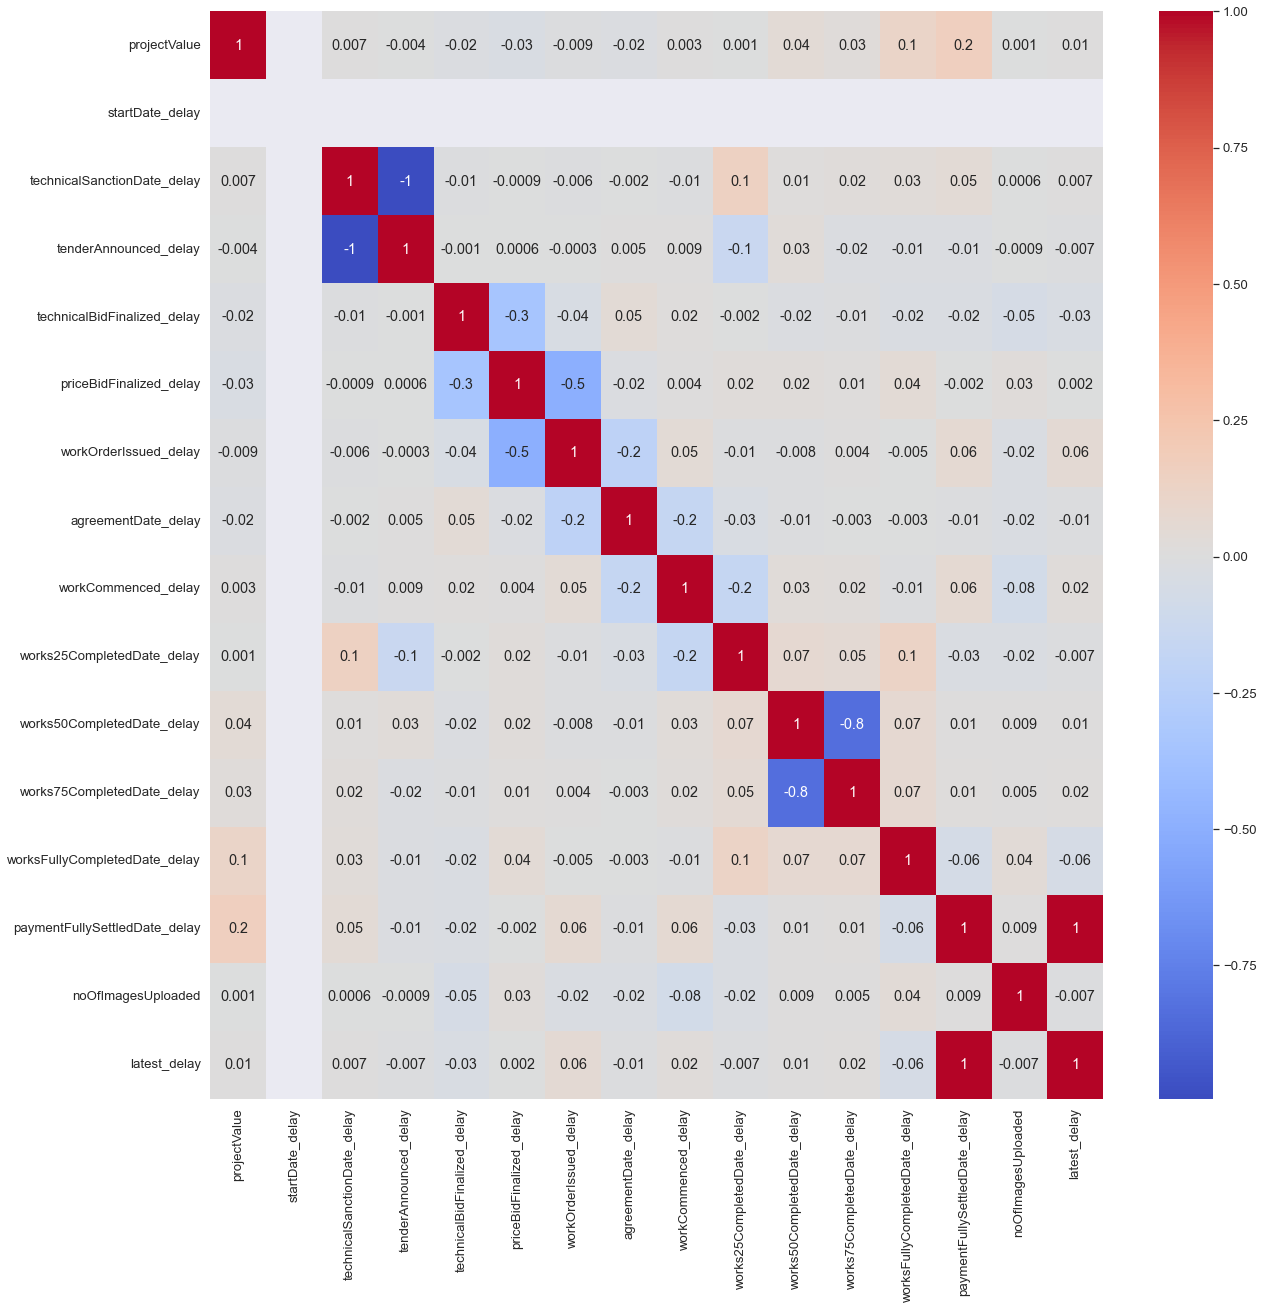

In [100]:
plt.figure(figsize=(20, 20), facecolor='w', edgecolor='k')
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, cmap='coolwarm',
            center=0,
            annot=True,
            fmt='.1g')


In [101]:
# Calculate Delay

